# ダウ平均株価 15分足

### 一つ上のディレクトリをパスに追加

In [10]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [11]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.common import get_name_15min_chart, get_name_15min_chart_now

## yfinance による株価データの取得

In [12]:
code = "DJI"
symbol = f"^{code}"
ticker = yf.Ticker(symbol)
df = ticker.history(period='1d', interval='15m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-23 09:30:00-04:00,41525.699219,41532.378906,41354.089844,41497.820312,21997856,0.0,0.0
2025-05-23 09:45:00-04:00,41496.601562,41529.289062,41450.820312,41485.210938,24408333,0.0,0.0
2025-05-23 10:00:00-04:00,41493.441406,41604.089844,41493.441406,41574.441406,23012132,0.0,0.0
2025-05-23 10:15:00-04:00,41575.550781,41591.101562,41495.199219,41545.480469,16198131,0.0,0.0
2025-05-23 10:30:00-04:00,41545.980469,41613.808594,41545.410156,41603.589844,15672103,0.0,0.0
2025-05-23 10:45:00-04:00,41602.941406,41614.351562,41488.128906,41490.218750,15027904,0.0,0.0
2025-05-23 11:00:00-04:00,41490.871094,41547.921875,41485.941406,41502.078125,13804540,0.0,0.0
2025-05-23 11:15:00-04:00,41509.691406,41595.570312,41493.500000,41587.628906,14084922,0.0,0.0
2025-05-23 11:30:00-04:00,41587.699219,41669.730469,41582.441406,41626.429688,13227167,0.0,0.0


## 前日終値の取得

In [13]:
# 過去一週間のデータを取得
td = datetime.timedelta(days=7)
dt_first = df.index[0]
dt_prev = dt_first - td
df_last = ticker.history(period='1d', interval='1d', start=str(dt_prev.date()))
n = len(df_last)
lastclose = df_last[n-2:n-1]['Close'].iloc[0]
# 確認のため出力
df_last[n-2:n-1]['Close']

Date
2025-05-22 00:00:00-04:00    41859.089844
Name: Close, dtype: float64

## ローソク足チャート（小さいサイズ）

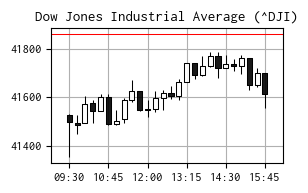

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 9

fig, ax = plt.subplots(figsize=(3, 2))
mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.axhline(y=lastclose, color="red", linewidth=0.75)
ax.set_ylabel(None)
ax.grid()

if "shortName" in ticker.info:
    ax.set_title(f"{ticker.info['shortName']} ({symbol})")
elif "longName" in ticker.info:
    ax.set_title(f"{ticker.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")
    
plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()